In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import MatlabRandn
from numpy.random import randn
from scipy.optimize import curve_fit
import scipy.stats as stats
import pylab 
from IPython.core.debugger import set_trace

In [72]:
def brownian_path(T, N):
    dt = T/N
    dW = np.sqrt(dt)*randn(N)
    dW = np.insert(dW, 0, 0)
    W = np.cumsum(dW)
    t = np.arange(0, T+dt, dt)
    return t, W

In [2]:
def brownian_paths(T, N, M):
    dt = T/N
    dW = np.random.normal(0, np.sqrt(dt), size=(M, N))
    dW = np.hstack([np.zeros((M, 1)), dW])
    W = np.cumsum(dW, axis=1)        
    t = np.arange(0, T+dt, dt)
    return t, W

In [73]:
t, Ws = brownian_paths(1, 1000, 1)

In [ ]:
def solve_em(f, g, X_0, t, W):
    X_em = np.zeros(len(W))
    X_temp = X_0
    X_em[0] = X_0
    for j in range(1, len(W)):
        W_inc = W[j] - W[j-1]
        dt = t[j] - t[j-1]
        X_temp = X_temp + dt*f(X_temp) + g(X_temp)*W_inc
        X_em[j] = X_temp
    return t, X_em

In [3]:
def cir_dereich(k, lamda, theta, X_0, t, W):
    
    alpha = (4*k*lamda - theta**2)/8
    beta = -k/2
    gamma = theta/2

    Y_sol = np.zeros(len(W))
    Y_temp = np.sqrt(X_0)
    Y_sol[0] = np.sqrt(X_0)
    
    for k in range(1, len(W)):
        W_inc = W[k] - W[k-1]
        dt = t[k] - t[k-1]
        Y_temp = (Y_temp + gamma*W_inc)/(2*(1-beta*dt)) \
                 + np.sqrt(
                     (Y_temp + gamma*W_inc)**2/(4*(1-beta*dt)**2) \
                     + (alpha*dt)/(1-beta*dt)
                 )
        Y_sol[k] = Y_temp
    X_sol = Y_sol**2
    return t, X_sol

In [3]:
def cir_dereich2(k, lamda, theta, X_0, t, W):
    
    alpha = (4*k*lamda - theta**2)/8
    beta = -k/2
    gamma = theta/2

    Y_sol = np.zeros(W.shape)
    
    Y_sol[:,0] = np.sqrt(X_0)
    Y_temp = np.repeat(np.sqrt(X_0), W.shape[0])
    #set_trace()
    for k in range(1, W.shape[1]):
        W_inc = W[:,k] - W[:,k-1]
        dt = t[k] - t[k-1]
        Y_temp = (Y_temp + gamma*W_inc)/(2*(1-beta*dt)) \
                 + np.sqrt(
                     (Y_temp + gamma*W_inc)**2/(4*(1-beta*dt)**2) \
                     + (alpha*dt)/(1-beta*dt)
                 )
        Y_sol[:,k] = Y_temp
    X_sol = Y_sol**2
    return t, X_sol

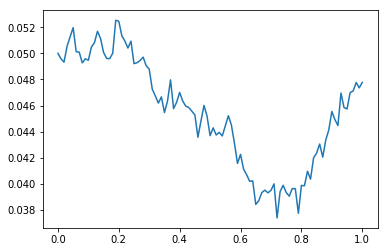

In [25]:
np.random.seed(0)
t, Ws = brownian_paths(1, 100, 3)
t_cir, X_cir = cir_dereich2(1, 0.05, 0.05, 0.05, t, Ws)
plt.plot(t_cir, X_cir[2])

In [100]:
X_cir

array([[0.05, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  ]])

In [90]:
Ws.shape

(1, 101)

In [86]:
X_cir

array([0.05])

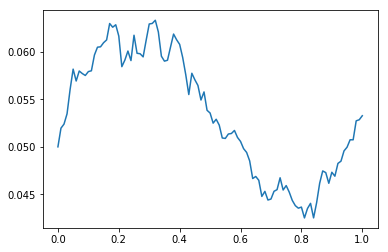

In [77]:
np.random.seed(0)
t, W = brownian_path(1, 100)
t_cir, X_cir = cir_dereich(1, 0.05, 0.05, 0.05, t, W)
plt.plot(t_cir, X_cir)

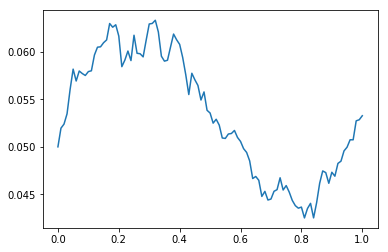

In [19]:
np.random.seed(0)
T = 1
N = 100
dt = T/N
dW = np.sqrt(dt)*randn(N)
dW = np.insert(dW, 0, 0)
W = np.cumsum(dW)

k = 1
lamda = 0.05
theta = 0.05#2*k*lamda * 0.01
#assert 2*k*lamda > theta**2
alpha = (4*k*lamda - theta**2)/8
beta = -k/2
gamma = theta/2

Y_implicit = np.zeros(N+1)


X_0 = lamda
Y_temp = np.sqrt(X_0)
Y_implicit[0] = np.sqrt(X_0)
for k in range(1, N+1):
    W_inc = dW[k]
    Y_temp = (Y_temp + gamma*dW[k])/(2*(1-beta*dt)) \
             + np.sqrt(
                 (Y_temp + gamma*dW[k])**2/(4*(1-beta*dt)**2) \
                 + (alpha*dt)/(1-beta*dt)
             )
    Y_implicit[k] = Y_temp
X_implicit = Y_implicit**2
plt.plot(t, X_implicit)

In [5]:
T = 1
max_N = 10
N_range = 2**np.arange(5, max_N)

t, Ws = brownian_paths(1, max_N, M)
t_cir, X_cir = cir_dereich2(1, 0.05, 0.05, 0.05, t, Ws)

dt = 1 / N_range
M = 100
for N in N_range:
    t, W = brownian_path(1, 100, M)
    t_cir, X_cir = cir_dereich(1, 0.05, 0.05, 0.05, t, W)